In [133]:
import folium 
import geopandas as gpd
import numpy as np
import pandas as pd
import os
import json 
import datetime
import folium.plugins
from folium.plugins import TimeSliderChoropleth
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap

In [134]:
data = pd.read_csv('/Users/emilyzhao/li-sound/data/processed/processed-surface.csv')
#data['DATE'] = pd.to_datetime(data['DATE'])

In [193]:
def heat_data(data):
    heat_data = []
    current_date = None
    current_sublist = []
    for _, row in data.iterrows():
        date = row['DATE']
        coordinates = (row['LON'], row['LAT'])
        weight = 1-float(row['DISSOLVED_OXYGEN_MG_L'] / data['DISSOLVED_OXYGEN_MG_L'].max())
        
        if pd.notnull(date) and pd.notnull(coordinates) and pd.notnull(weight):
            if date != current_date:
                if current_sublist:
                    heat_data.append(current_sublist)
                current_sublist = []
                current_date = date
            
            # switch lat and lon
            current_sublist.append([coordinates[1], coordinates[0], weight])

    if current_sublist:
        heat_data.append(current_sublist)

    return heat_data

In [144]:
## check that lengths are the same
# df = heat_data(data)
# len(df)
# index = data['DATE'].unique()
# len(index)

In [213]:
df = heat_data(data)
index = [s.strip()[:8] for s in data['DATE'].unique()]
map = folium.Map(location=[40.979142, -73.08496], zoom_start=10)
heatmap = HeatMapWithTime(df, index=index, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.9: 'red'})
heatmap.add_to(map)
map.save('long_island_water_quality_map.html')
display(map)

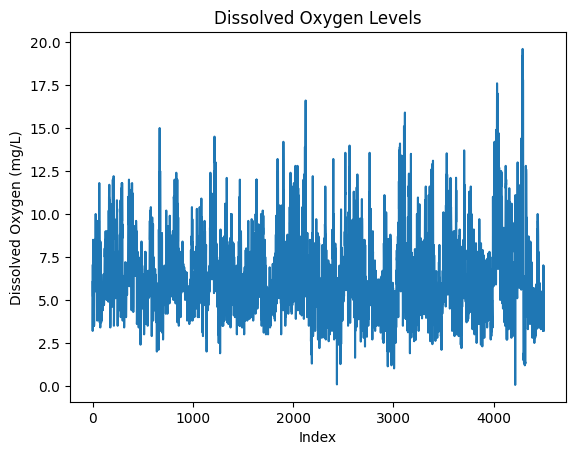

In [214]:
import matplotlib.pyplot as plt

# Plotting dissolved oxygen (mg/L)
plt.plot(data['DISSOLVED_OXYGEN_MG_L'])
plt.xlabel('Index')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.title('Dissolved Oxygen Levels')
plt.show()